# Randomly simulate the alpha_vir and M correlation

## Importing packages

In [25]:
import numpy as np
import math
from scipy.ndimage import gaussian_filter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
matplotlib.use('PDF')
%matplotlib inline

from numpy import size
from scipy.optimize import curve_fit

import os
import sys
sys.path.append('./')

/scratch/home/hlu/astronomical_softwares/python/anaconda3/envs/learningPython3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Defining functions

In [26]:
def mass_sampler(n_massscalings, alpha, min_mass, max_mass):
  """
  Purpose:
    Probability of a core to have mass M: P(M) \prop M^alpha
  
  Input:
    n_massscalings: number of samplers to use
    alpha:    power law index of the disk mass distribution function
    min_mass: [Solar mass]
    max_mass: [Solar mass]

  Return:
    A numpy array for density scaling [in units of Solar mass]
    
  """
  out_densityscalings = []
  pmax = min_mass ** alpha

  while ( len(out_densityscalings) < n_massscalings) :
    
    mass = np.random.rand(1) * (max_mass - min_mass) + min_mass
    prob = np.random.rand(1) * pmax
    if prob <= mass ** alpha:
      out_densityscalings.append( mass[0] )

  return np.array( out_densityscalings )

### Randomly samlpe Mgas, and then generate M_vir assuming Mgas = M_vir

In [27]:
num_samples = 10000

# Salpeter mass function
alpha    = -2.35
min_mass = 0.1
max_mass = 100

Mgas  = mass_sampler(num_samples, alpha, min_mass, max_mass)
M_vir = Mgas

### Resampling based on certain assumption of noise

#### Assuming Gaussian noise for Mgas and velocity

In [28]:
Mgas_err      = np.random.standard_normal(num_samples) * Mgas * 0.2
Mgas_measured = Mgas + Mgas_err

M_vir_measured = ( np.sqrt(Mgas) + np.random.standard_normal(num_samples) * np.sqrt(Mgas) * 0.2 ) ** 2.0

alpha_vir = M_vir_measured / Mgas_measured

## Plotting

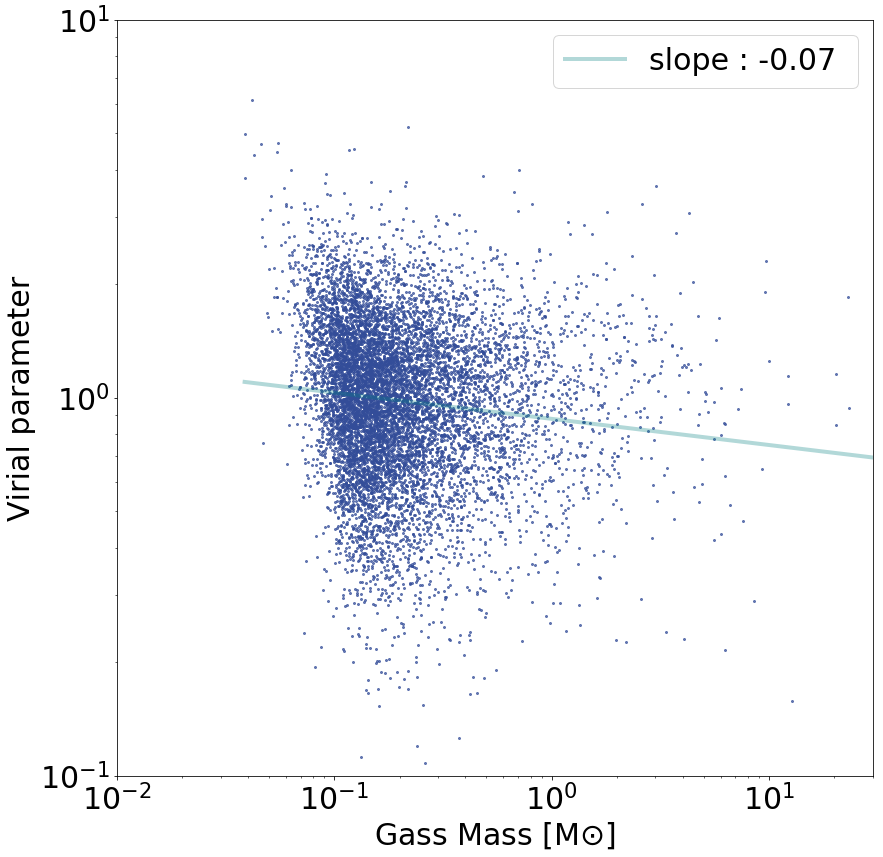

In [29]:
###### Initializing Figure #############################
fig = plt.figure(
                 figsize = (14, 14)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])
# plt.axis([2.0, 3.7, 0, 10])

# Set the x/y axis title and legend
plt.xlabel('Gass Mass [M$\odot$]',     size = 30.0)
plt.ylabel('Virial parameter',       size = 30.0)

    
plt.xscale('log')
plt.yscale('log')
plt.rc('font', size=30.0)          # controls default text sizes
plt.rc('xtick', labelsize=30.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30.0)    # fontsize of the tick labels
########################################################

plt.plot( 
           Mgas_measured,
           alpha_vir,
           'o',
           color=(0.2,0.3,0.6, 0.7),
           markersize=2, 
           # label = "bla"
          )


# Plot fitted results
z = np.polyfit(
               np.log10(Mgas_measured), 
               np.log10(alpha_vir), 
               1
              )
p = np.poly1d(z)
plt.plot( 
         np.sort(  Mgas_measured  ), 
         10.0 ** ( p( np.sort( np.log10(Mgas_measured) )  ) ),
         '-',
         color = (0.0, 0.5, 0.5, 0.3),
         linewidth = 4.0,
         label = 'slope : %s '%str( round(z[0], 2) )
         )



plt.legend(loc=1, fontsize=30)
plt.xlim( (0.01, 30.0) )
plt.ylim( (0.1, 10) )
plt.savefig('alphavir_Salpeter.pdf', 
            transparent = True
           )